In [31]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from shapely.geometry import MultiPolygon, Polygon, LineString, Point


In [32]:
bus_long_lat = pd.read_csv("bus.csv")

In [33]:
bus_long_lat

,vehicle_reg_No,MYT_TIMESTAMP,longitude,latitude
0,WA9451M,2023-09-01T19:05:29,101.706009,2.75198
1,WA9451M,2023-09-01T19:05:59,101.706009,2.75202
2,WA9451M,2023-09-01T19:06:29,101.706009,2.75200
3,WA9451M,2023-09-01T19:07:29,101.705833,2.75205
4,WA9451M,2023-09-01T19:07:59,101.705833,2.75195
...,...,...,...,...
4088,WA9451M,2023-09-07T11:44:33,101.705498,2.75197
4089,WA9451M,2023-09-07T11:45:03,101.705498,2.75190
4090,WA9451M,2023-09-07T11:45:33,101.705658,2.75187
4091,WA9451M,2023-09-07T11:46:03,101.705658,2.75188


In [50]:
df_shapely = gpd.GeoDataFrame(bus_long_lat)
df_shapely

,vehicle_reg_No,MYT_TIMESTAMP,longitude,latitude
0,WA9451M,2023-09-01T19:05:29,101.706009,2.75198
1,WA9451M,2023-09-01T19:05:59,101.706009,2.75202
2,WA9451M,2023-09-01T19:06:29,101.706009,2.75200
3,WA9451M,2023-09-01T19:07:29,101.705833,2.75205
4,WA9451M,2023-09-01T19:07:59,101.705833,2.75195
...,...,...,...,...
4088,WA9451M,2023-09-07T11:44:33,101.705498,2.75197
4089,WA9451M,2023-09-07T11:45:03,101.705498,2.75190
4090,WA9451M,2023-09-07T11:45:33,101.705658,2.75187
4091,WA9451M,2023-09-07T11:46:03,101.705658,2.75188


In [51]:
#df_shapely.crs = 'EPSG:4326'
df_shapely['geometry'] = gpd.points_from_xy(df_shapely.longitude, df_shapely.latitude)

/var/folders/hq/z4j3ghzx4rd9w74bvh4tpkpm0000gn/T/ipykernel_12302/4135224683.py:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  df_shapely['geometry'] = gpd.points_from_xy(df_shapely.longitude, df_shapely.latitude)


In [52]:
df_shapely

,vehicle_reg_No,MYT_TIMESTAMP,longitude,latitude,geometry
0,WA9451M,2023-09-01T19:05:29,101.706009,2.75198,POINT (101.70601 2.75198)
1,WA9451M,2023-09-01T19:05:59,101.706009,2.75202,POINT (101.70601 2.75202)
2,WA9451M,2023-09-01T19:06:29,101.706009,2.75200,POINT (101.70601 2.75200)
3,WA9451M,2023-09-01T19:07:29,101.705833,2.75205,POINT (101.70583 2.75205)
4,WA9451M,2023-09-01T19:07:59,101.705833,2.75195,POINT (101.70583 2.75195)
...,...,...,...,...,...
4088,WA9451M,2023-09-07T11:44:33,101.705498,2.75197,POINT (101.70550 2.75197)
4089,WA9451M,2023-09-07T11:45:03,101.705498,2.75190,POINT (101.70550 2.75190)
4090,WA9451M,2023-09-07T11:45:33,101.705658,2.75187,POINT (101.70566 2.75187)
4091,WA9451M,2023-09-07T11:46:03,101.705658,2.75188,POINT (101.70566 2.75188)


In [53]:
Depart_pick = [Point(101.70502, 2.75242), Point(101.70593, 2.75302), Point(101.70611, 2.75234), Point(101.70548, 2.75188)]

Depart_route = [Point(101.70536, 2.75177), Point(101.7099, 2.7445), Point(101.7111, 2.7452), Point(101.71317, 2.74686), Point(101.71247, 2.74792),
                Point(101.71020, 2.74653), Point(101.70626, 2.75238)]

Depart_drop = [Point(101.71164, 2.74900), Point(101.71240, 2.74941), Point(101.71272, 2.74891), Point(101.71210, 2.74830)]

In [54]:
Depart_pick_poly = Polygon([[p.x, p.y] for p in Depart_pick])
Depart_route_poly = Polygon([[p.x, p.y] for p in Depart_route])
Depart_drop_poly = Polygon([[p.x, p.y] for p in Depart_drop])



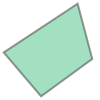

In [55]:
Depart_pick_poly

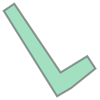

In [56]:
Depart_route_poly

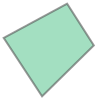

In [57]:
Depart_drop_poly

In [63]:
zones = []
for index, row in df_shapely.iterrows():
    if row["geometry"].within(Depart_pick_poly):
        zones.append('pick')
    elif row["geometry"].within(Depart_route_poly):
        zones.append('route')
    elif row["geometry"].within(Depart_drop_poly):
        zones.append('drop')
    else:
        zones.append('unknown')


In [64]:
zones

['route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'unknown',
 'route',
 'route',
 'route',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'pick',
 'route',
 'route',
 'pick',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'unknown',
 'route',
 'unknown',
 'unknown',
 'route',
 'route',
 'route',
 'route',
 'route',
 'unknown',
 'pick',
 'pick',
 'unknown',
 'route',
 'pick',
 'route',
 'route',
 'route',
 'route',
 'route',
 'route',
 'unknown',
 'unknown',
 'unknown',
 'route',
 'route',
 'unknown',
 'route',
 'route',
 'route',
 'route',
 'route',
 'unknown',
 'route',
 'route',
 'route',
 'route',
 'pick',
 'unknown',
 'route',
 'unknown',
 'unknown',
 'route',
 'route',
 'route',
 'route',
 'route',
 'pick',
 'route',
 'route',
 'route',
 'route',
 'rou

In [65]:
df_shapely['zones'] = zones

In [66]:
df_shapely

,vehicle_reg_No,MYT_TIMESTAMP,longitude,latitude,geometry,zones
0,WA9451M,2023-09-01T19:05:29,101.706009,2.75198,POINT (101.70601 2.75198),route
1,WA9451M,2023-09-01T19:05:59,101.706009,2.75202,POINT (101.70601 2.75202),route
2,WA9451M,2023-09-01T19:06:29,101.706009,2.75200,POINT (101.70601 2.75200),route
3,WA9451M,2023-09-01T19:07:29,101.705833,2.75205,POINT (101.70583 2.75205),route
4,WA9451M,2023-09-01T19:07:59,101.705833,2.75195,POINT (101.70583 2.75195),route
...,...,...,...,...,...,...
4088,WA9451M,2023-09-07T11:44:33,101.705498,2.75197,POINT (101.70550 2.75197),pick
4089,WA9451M,2023-09-07T11:45:03,101.705498,2.75190,POINT (101.70550 2.75190),pick
4090,WA9451M,2023-09-07T11:45:33,101.705658,2.75187,POINT (101.70566 2.75187),route
4091,WA9451M,2023-09-07T11:46:03,101.705658,2.75188,POINT (101.70566 2.75188),route
